In [1]:
import numpy as np
from tensorflow.keras.applications import resnet

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

In [4]:
train_data_dir = 'C:\\Users\\user\\Downloads\\train'
test_data_dir = 'C:\\Users\\user\\Downloads\\test'

In [5]:
from keras_preprocessing.image import ImageDataGenerator

In [6]:
img_rows, img_cols = 224, 224 
model = resnet.ResNet50(weights='imagenet', include_top = False, input_shape=(img_rows,img_cols,3))

94773248/94765736 [==============================] - 608s 6us/step


In [7]:
for layer in model.layers:
    layer.trainable = False

In [8]:
#no trainable paramters in our model since we gonna use the pre trained weights
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [9]:
def addTopModel(bottom_model, num_classes, D=256):
    #creates the top or head of the model that will be placed ontop of the bottom layers

    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [10]:
num_classes=2
newmodel= addTopModel(model,num_classes)

In [12]:
modelnew = Model(inputs = model.input, outputs = newmodel)


In [13]:
modelnew.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [14]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

In [15]:
train_batchsize = 16

In [16]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')

Found 720 images belonging to 2 classes.


In [17]:
modelnew.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

In [18]:
history = modelnew.fit_generator(
    train_generator,
    steps_per_epoch = 32,
    epochs = 3,
   )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 32 steps
Epoch 1/5
32/32 [==============================] - 194s 6s/step - loss: 16.0635 - accuracy: 0.8477
Epoch 2/5
32/32 [==============================] - 183s 6s/step - loss: 2.0873 - accuracy: 0.9434
Epoch 3/5
32/32 [==============================] - 186s 6s/step - loss: 0.9212 - accuracy: 0.9727
Epoch 4/5
32/32 [==============================] - 183s 6s/step - loss: 1.8162 - accuracy: 0.9551
Epoch 5/5
32/32 [==============================] - 191s 6s/step - loss: 1.5877 - accuracy: 0.9512


In [19]:
modelnew.save('facedetect.h5')

In [22]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Resnet')

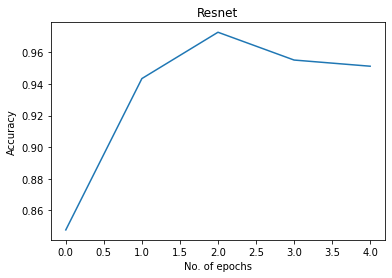

In [28]:
plt.plot(history.history['accuracy'])
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Resnet")